In [1]:
import pandas as pd

In [2]:
# import pandas as pd

# Directory path
datasets_directory = 'dataset/80_10_10_synopsis/'

# Load the datasets
train_df = pd.read_csv(datasets_directory+'train.csv')
test_df = pd.read_csv(datasets_directory+'test.csv')
val_df = pd.read_csv(datasets_directory+'validation.csv')

# # Rename the 'text' column to 'sentence1' for each dataframe
# train_df.rename(columns={'text': 'sentence1'}, inplace=True)
# test_df.rename(columns={'text': 'sentence1'}, inplace=True)
# val_df.rename(columns={'text': 'sentence1'}, inplace=True)

# # Save the updated dataframes back to their respective CSV files
# train_df.to_csv(datasets_directory+'train.csv', index=False)
# test_df.to_csv(datasets_directory+'test.csv', index=False)
# val_df.to_csv(datasets_directory+'validation.csv', index=False)


In [3]:
train_df.columns

Index(['sentence1', 'label'], dtype='object')

In [4]:
train_df.columns

Index(['sentence1', 'label'], dtype='object')

In [5]:
val_df.columns

Index(['sentence1', 'label'], dtype='object')

In [6]:
train_df.shape, test_df.shape, val_df.shape

((15570, 2), (5190, 2), (5191, 2))

In [7]:
from normalizer import normalize

In [8]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

In [9]:
import torch
torch.cuda.empty_cache()

In [1]:
import subprocess

def run_command(command):
    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)

    while True:
        output = process.stdout.readline()
        if output == '' and process.poll() is not None:
            break
        if output:
            print(output.strip())

    return process.poll()

# Example usage:
command_to_run = 'python banglabert/sequence_classification/sequence_classification.py --model_name_or_path "csebuetnlp/banglabert" --dataset_dir "dataset/80_10_10_synopsis/" --output_dir "dataset/80_10_10_synopsis/models/" --learning_rate=2e-5 --warmup_ratio 0.1 --gradient_accumulation_steps 2 --weight_decay 0.1 --lr_scheduler_type "linear" --per_device_train_batch_size=8 --per_device_eval_batch_size=8 --max_seq_length 512 --logging_strategy "epoch" --evaluation_strategy "epoch" --num_train_epochs=10 --overwrite_output_dir --do_train --do_eval --do_predict'
result = run_command(command_to_run)

if result == 0:
    print("Command executed successfully")
else:
    print(f"Command failed with return code {result}")


09/28/2025 23:56:41 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1distributed training: True, 16-bits training: False
[WARNING|modeling_utils.py:3994] 2025-09-28 23:56:46,496 >> Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
banglabert/sequence_classification/sequence_classification.py:380: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
required_metrics = [load_metric(k) for k in metric_names]
d:\Installed Softwares\All kind of IDE or Editors or Programming Language\Anaconda3\envs\nlpthesis\lib\site-pa

In [1]:
import csv

# Read the text file
with open('dataset/80_10_10_synopsis/models/predictions.txt', 'r') as infile:
    lines = infile.readlines()

# Process the lines to create a list of lists for CSV data
csv_data = []
for line in lines[1:]:  # Skip the header line
    index, prediction = line.strip().split('\t')
    csv_data.append([index, prediction])

# Write the CSV data to a new CSV file
with open('dataset/80_10_10_synopsis/models/predictions.csv', 'w', newline='') as outfile:
    csv_writer = csv.writer(outfile)
    csv_writer.writerow(['text', 'label'])  # Write the header
    csv_writer.writerows(csv_data)


In [2]:
import pandas as pd
from sklearn.metrics import classification_report

# Load the true labels and predicted labels from the CSV file
data = pd.read_csv('dataset/80_10_10_synopsis/models/predictions.csv')

# Assuming 'true_labels' are the true labels and 'predicted_labels' are the predicted labels in the CSV
true_labels = data['label']  # Replace 'true_labels' with the actual column name in your CSV
datasets_directory = 'dataset/80_10_10_synopsis/'

# # Load the datasets
# train_df = pd.read_csv(datasets_directory+'train.csv')
test_df = pd.read_csv(datasets_directory+'test.csv')
# val_df = pd.read_csv(datasets_directory+'validation.csv')
predicted_labels = test_df['label']  # Replace 'predicted_labels' with the actual column name in your CSV

# Generate a classification report
classification_report_result = classification_report(true_labels, predicted_labels, digits=4)

# Print the classification report
print(classification_report_result)


                             precision    recall  f1-score   support

                  Adventure     0.4085    0.5000    0.4496        58
Biography and Autobiography     0.7952    0.7705    0.7826      1159
              Classic Novel     0.4160    0.5000    0.4541       208
              Classic Story     0.2049    0.3247    0.2513        77
         Contemporary Novel     0.7519    0.6705    0.7089      1044
         Contemporary Story     0.6053    0.6659    0.6341       410
Cooking, Food and Nutrition     1.0000    0.9286    0.9630        42
      History and Tradition     0.7387    0.7750    0.7564       609
                       Math     0.9649    0.9649    0.9649        57
                    Mystery     0.4789    0.5965    0.5312       114
                 Philosophy     0.6741    0.6233    0.6477       146
                   Politics     0.4286    0.4233    0.4259       163
                  Religious     0.8030    0.8356    0.8190       517
             Sciene Fiction     0

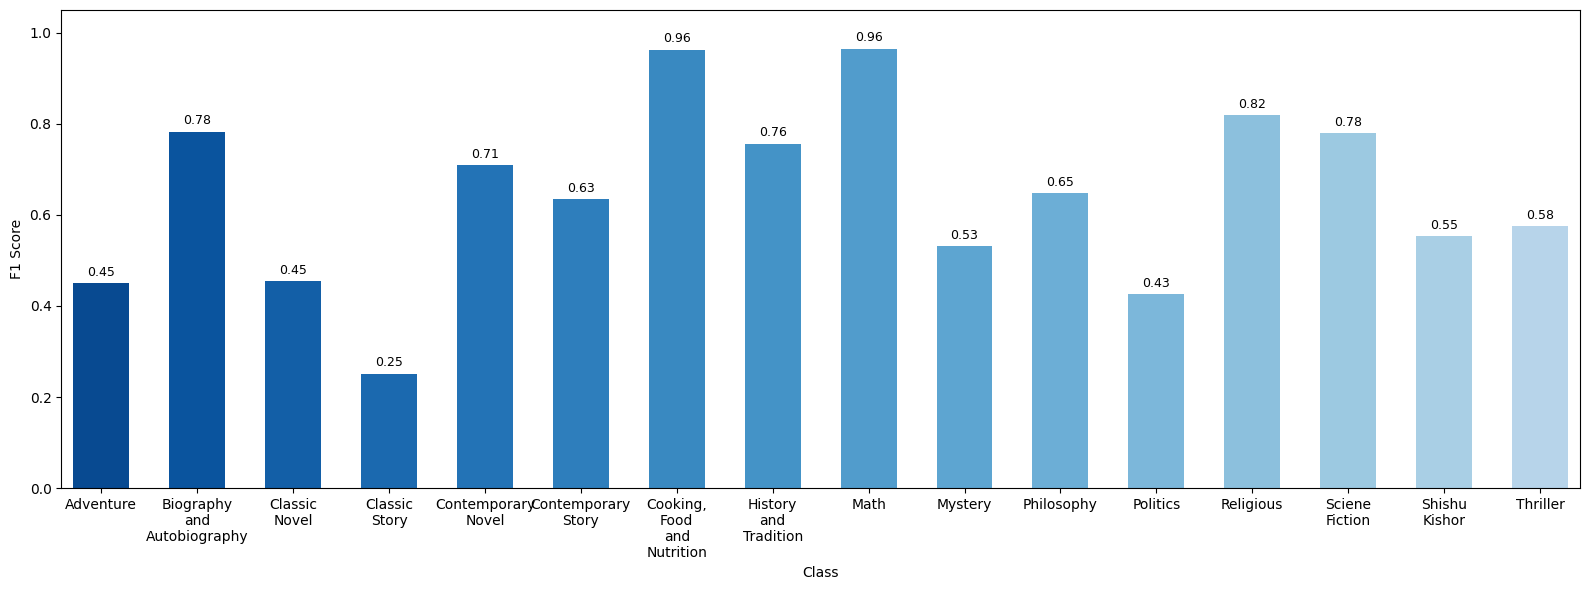

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.metrics import classification_report

# Classification report as dict
report = classification_report(true_labels, predicted_labels, output_dict=True)

# Extract class-wise F1 scores
class_f1 = {label: metrics['f1-score']
            for label, metrics in report.items()
            if label not in ['accuracy', 'macro avg', 'weighted avg']}

# Convert to sorted order by class name
classes = list(class_f1.keys())
f1_scores = list(class_f1.values())

# Multi-line labels without breaking words
wrapped_labels = [label.replace(" ", "\n") for label in classes]

# Spread bars apart
x = np.arange(len(classes)) * 1.2  
width = 0.7   # bar width

fig, ax = plt.subplots(figsize=(16,6))

# 🎨 Deep → light gradient left to right
colors = cm.Blues(np.linspace(0.9, 0.3, len(classes)))

bars = ax.bar(x, f1_scores, color=colors, width=width)

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')

# Add F1 score labels above bars
for p in bars:
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.01,
            f"{p.get_height():.2f}",
            ha='center', va='bottom', fontsize=9)

# 🔑 Add a small margin on both sides
margin = 0.5
ax.set_xlim(min(x) - margin, max(x) + margin)

ax.set_xlabel('Class')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1.05)
plt.tight_layout()
plt.show()


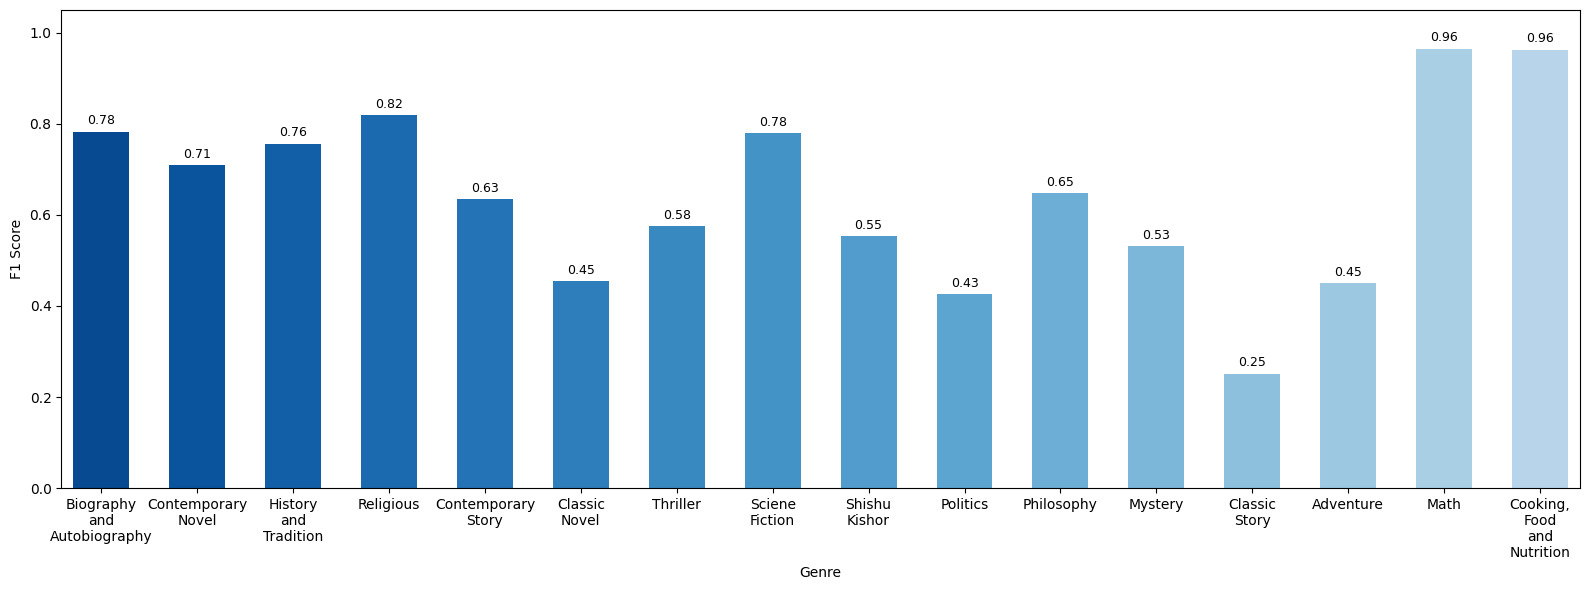

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.metrics import classification_report

# Define the fixed order of genres
genre_order = [
    "Biography and Autobiography",
    "Contemporary Novel",
    "History and Tradition",
    "Religious",
    "Contemporary Story",
    "Classic Novel",
    "Thriller",
    "Sciene Fiction",
    "Shishu Kishor",
    "Politics",
    "Philosophy",
    "Mystery",
    "Classic Story",
    "Adventure",
    "Math",
    "Cooking, Food and Nutrition"
]

# Classification report as dict
report = classification_report(true_labels, predicted_labels, output_dict=True)

# Extract class-wise F1 scores (ignore averages)
class_f1 = {label: metrics['f1-score']
            for label, metrics in report.items()
            if label not in ['accuracy', 'macro avg', 'weighted avg']}

# Reorder according to genre_order
classes = [g for g in genre_order if g in class_f1]
f1_scores = [class_f1[g] for g in classes]

# Multi-line labels (space → newline)
wrapped_labels = [label.replace(" ", "\n") for label in classes]

# Spread bars apart
x = np.arange(len(classes)) * 1.2  
width = 0.7

fig, ax = plt.subplots(figsize=(16,6))

# 🎨 Deep → light gradient left to right
colors = cm.Blues(np.linspace(0.9, 0.3, len(classes)))

bars = ax.bar(x, f1_scores, color=colors, width=width)

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')

# Add F1 score labels above bars
for p in bars:
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.01,
            f"{p.get_height():.2f}",
            ha='center', va='bottom', fontsize=9)

# Margins & labels
margin = 0.5
ax.set_xlim(min(x) - margin, max(x) + margin)
ax.set_xlabel('Genre')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()


In [5]:
from sklearn.metrics import confusion_matrix


# Create the confusion matrix
confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix_result)

Confusion Matrix:
[[ 29   0   1   0   2   0   0   0   0   8   0   1   1   6   3   7]
 [  2 893   8   2  24  22   0  88   0   1   9  48  53   0   5   4]
 [  0   4 104  11  68   5   0   1   0   2   0   0   1   1   4   7]
 [  3   5   3  25   3  32   0   3   0   1   0   1   1   0   0   0]
 [  4  29 109  19 700  97   0   8   0   7   0   2   8  12  23  26]
 [  1  15   6  54  44 273   0   1   0   0   4   2   3   2   4   1]
 [  0   1   1   0   0   1  39   0   0   0   0   0   0   0   0   0]
 [  0  61   2   0   5   4   0 472   0   1   5  32  18   1   5   3]
 [  0   0   0   0   1   0   0   0  55   0   0   0   1   0   0   0]
 [ 13   3   0   1   2   1   0   0   0  68   0   0   0   2   2  22]
 [  0  19   1   0   3   2   0   8   1   0  91   4  17   0   0   0]
 [  1  41   1   0   1   0   0  40   0   1   9  69   0   0   0   0]
 [  0  44   1   2   3   2   0  12   0   0  17   1 432   0   1   2]
 [  1   0   0   1   7   1   0   2   1   2   0   1   1 120   5   2]
 [  5   6   6   6  38   7   0   2   0   6   

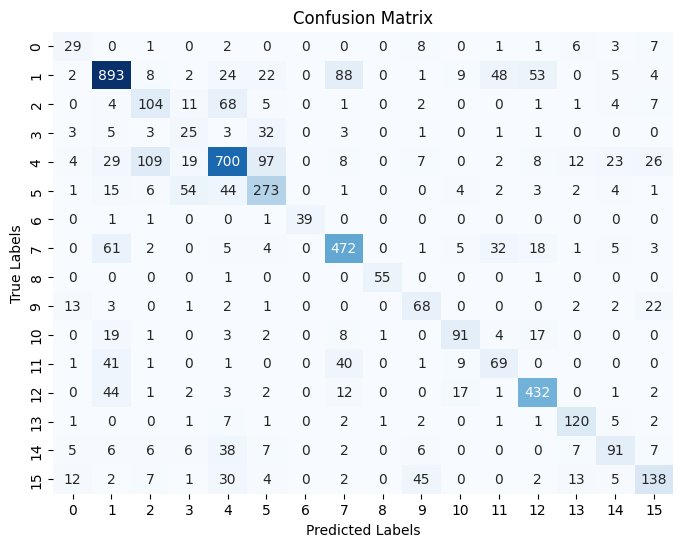

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Save the confusion matrix as an image file
plt.savefig("dataset/80_10_10_synopsis/models/confusion_matrix.png")
plt.show()


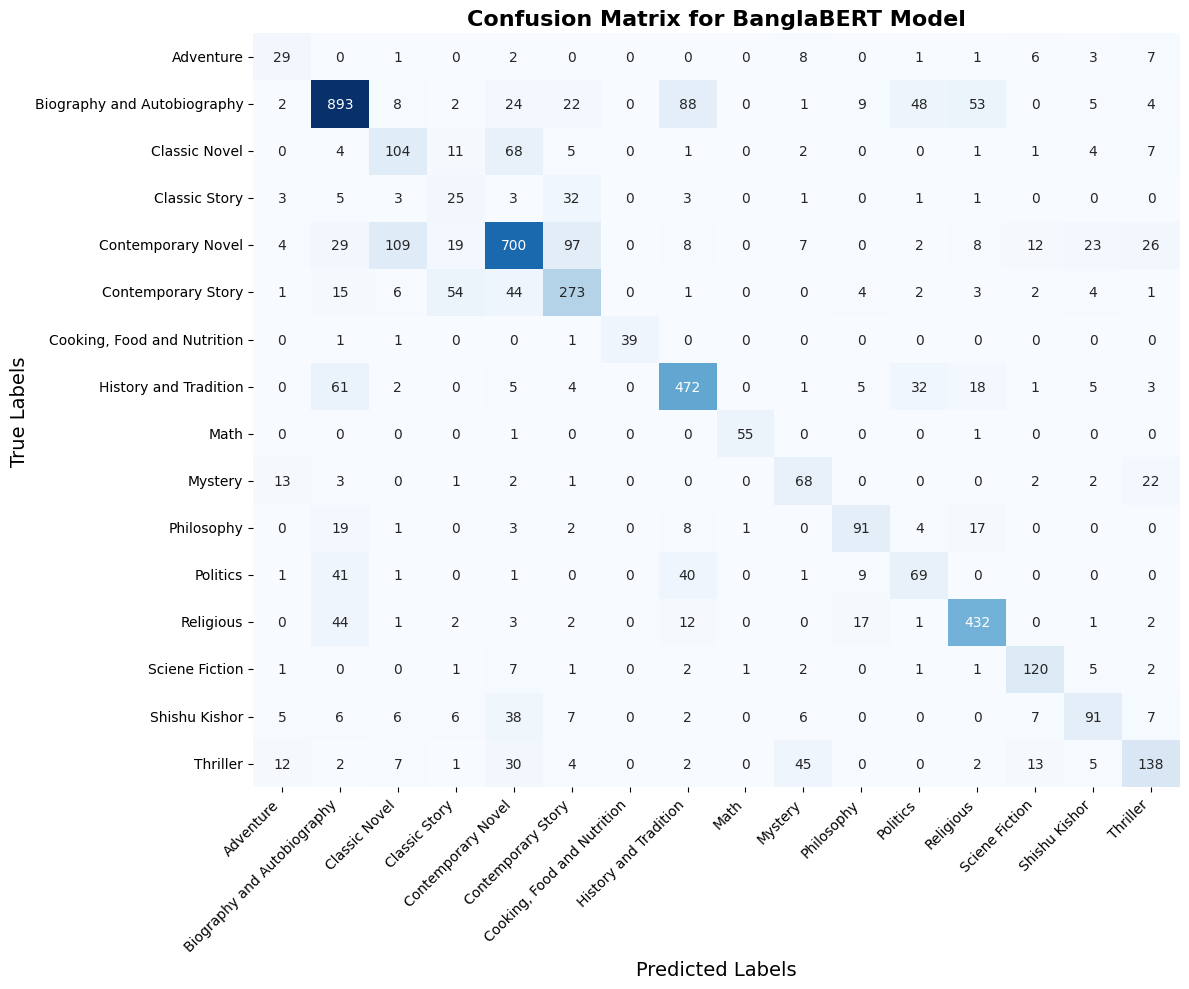

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have true_labels, predicted_labels, and class names
class_names = [
    "Adventure", "Biography and Autobiography", "Classic Novel", "Classic Story",
    "Contemporary Novel", "Contemporary Story", "Cooking, Food and Nutrition",
    "History and Tradition", "Math", "Mystery", "Philosophy", "Politics",
    "Religious", "Sciene Fiction", "Shishu Kishor", "Thriller"
]

# Compute confusion matrix
confusion_matrix_result = confusion_matrix(true_labels, predicted_labels, labels=class_names)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    confusion_matrix_result,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title("Confusion Matrix for BanglaBERT Model", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig("dataset/80_10_10_synopsis/models/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()


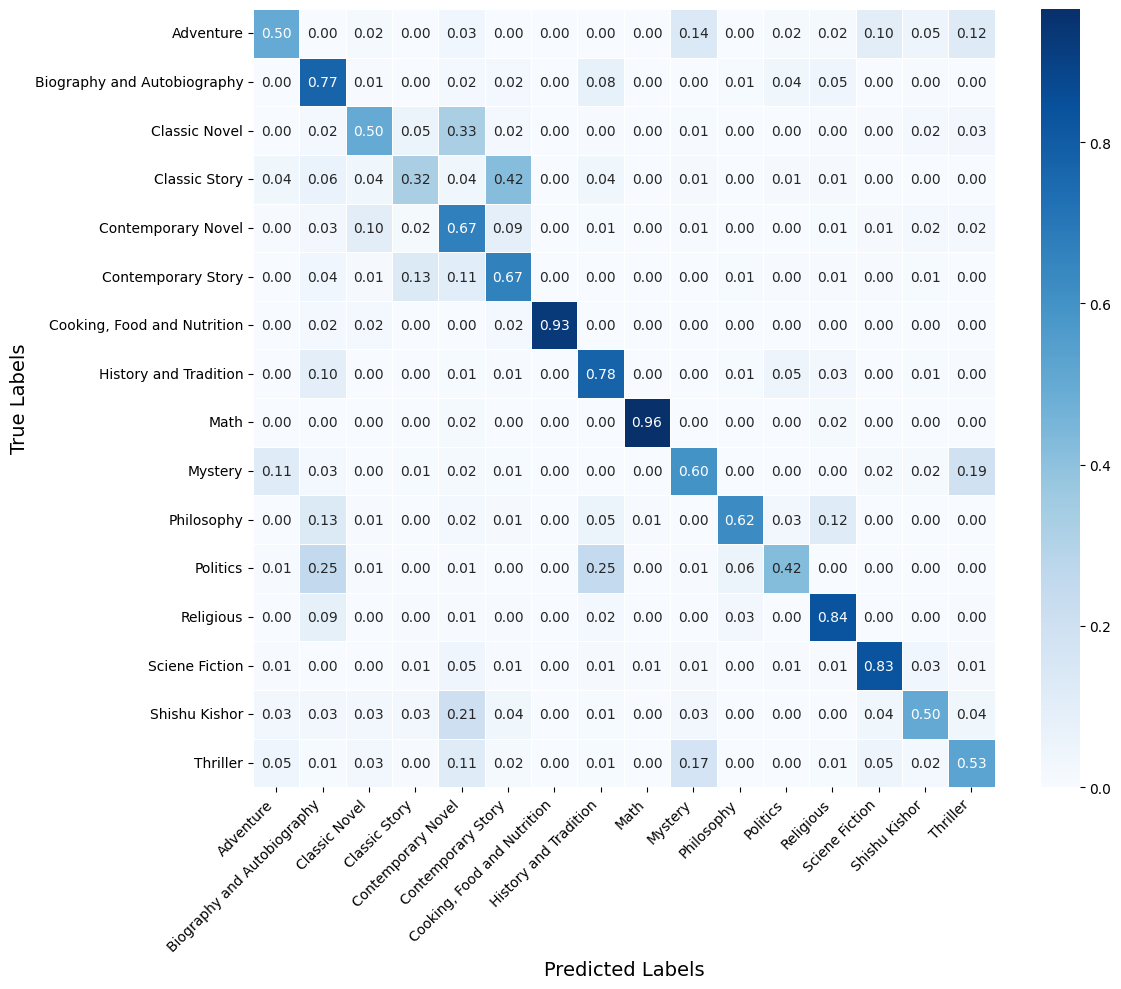

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define class names
class_names = [
    "Adventure", "Biography and Autobiography", "Classic Novel", "Classic Story",
    "Contemporary Novel", "Contemporary Story", "Cooking, Food and Nutrition",
    "History and Tradition", "Math", "Mystery", "Philosophy", "Politics",
    "Religious", "Sciene Fiction", "Shishu Kishor", "Thriller"
]

# Compute normalized confusion matrix (each row sums to 1)
cm = confusion_matrix(true_labels, predicted_labels, labels=class_names, normalize='true')

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar=True,
    xticklabels=class_names,
    yticklabels=class_names,
    linewidths=0.5
)

# Titles and labels
#plt.title("Normalized Confusion Matrix for BanglaBERT Model", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)

# Improve label readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout and save
plt.tight_layout()
plt.savefig("dataset/80_10_10_synopsis/models/confusion_matrix_normalized.png", dpi=300, bbox_inches="tight")
plt.show()


# EXTRA CODE

In [8]:
'''
!python banglabert/sequence_classification/sequence_classification.py \
    --model_name_or_path "csebuetnlp/banglabert" \
    --dataset_dir "dataset/70_15_15_title/" \
    --output_dir "dataset/70_15_15_title/" \
    --learning_rate=2e-5 \
    --warmup_ratio 0.1 \
    --gradient_accumulation_steps 2 \
    --weight_decay 0.1 \
    --lr_scheduler_type "linear"  \
    --per_device_train_batch_size=8 \
    --per_device_eval_batch_size=8 \
    --max_seq_length 512 \
    --logging_strategy "epoch" \
    --evaluation_strategy "epoch" \
    --num_train_epochs=6 \
    --overwrite_output_dir \
    --do_train --do_eval --do_predict
'''

'\n!python banglabert/sequence_classification/sequence_classification.py     --model_name_or_path "csebuetnlp/banglabert"     --dataset_dir "dataset/70_15_15_title/"     --output_dir "dataset/70_15_15_title/"     --learning_rate=2e-5     --warmup_ratio 0.1     --gradient_accumulation_steps 2     --weight_decay 0.1     --lr_scheduler_type "linear"      --per_device_train_batch_size=8     --per_device_eval_batch_size=8     --max_seq_length 512     --logging_strategy "epoch"     --evaluation_strategy "epoch"     --num_train_epochs=6     --overwrite_output_dir     --do_train --do_eval --do_predict\n'

In [9]:
#python banglabert/sequence_classification/sequence_classification.py --model_name_or_path "csebuetnlp/banglabert"  --dataset_dir "dataset/70_15_15_title/"   --output_dir "dataset/70_15_15_title/models/"     --learning_rate=2e-5     --warmup_ratio 0.1     --gradient_accumulation_steps 2     --weight_decay 0.1     --lr_scheduler_type "linear"      --per_device_train_batch_size=8     --per_device_eval_batch_size=8     --max_seq_length 512     --logging_strategy "epoch"     --evaluation_strategy "epoch"   --num_train_epochs=6     --overwrite_output_dir     --do_train --do_eval --do_predict 